In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx

In [35]:
dataset = pd.read_csv('Dataset/fao_trade_multiplex.txt', sep=' ', header=None)
dataset.rename(columns={0: 'Good', 1: 'Export_Country', 2: 'Import_Country', 3: 'Quantity'}, inplace=True)

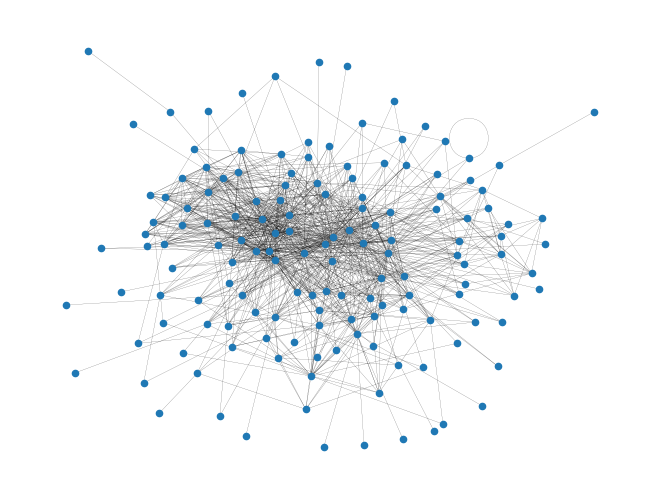

In [42]:
dataset_beef = dataset[dataset['Good'] == 148]
edge_list = list(zip(dataset_beef['Export_Country'], dataset_beef['Import_Country']))

G = nx.from_edgelist(edge_list)

nx.draw(G, pos=nx.kamada_kawai_layout(G), node_size=20, width=0.1)
plt.show()

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


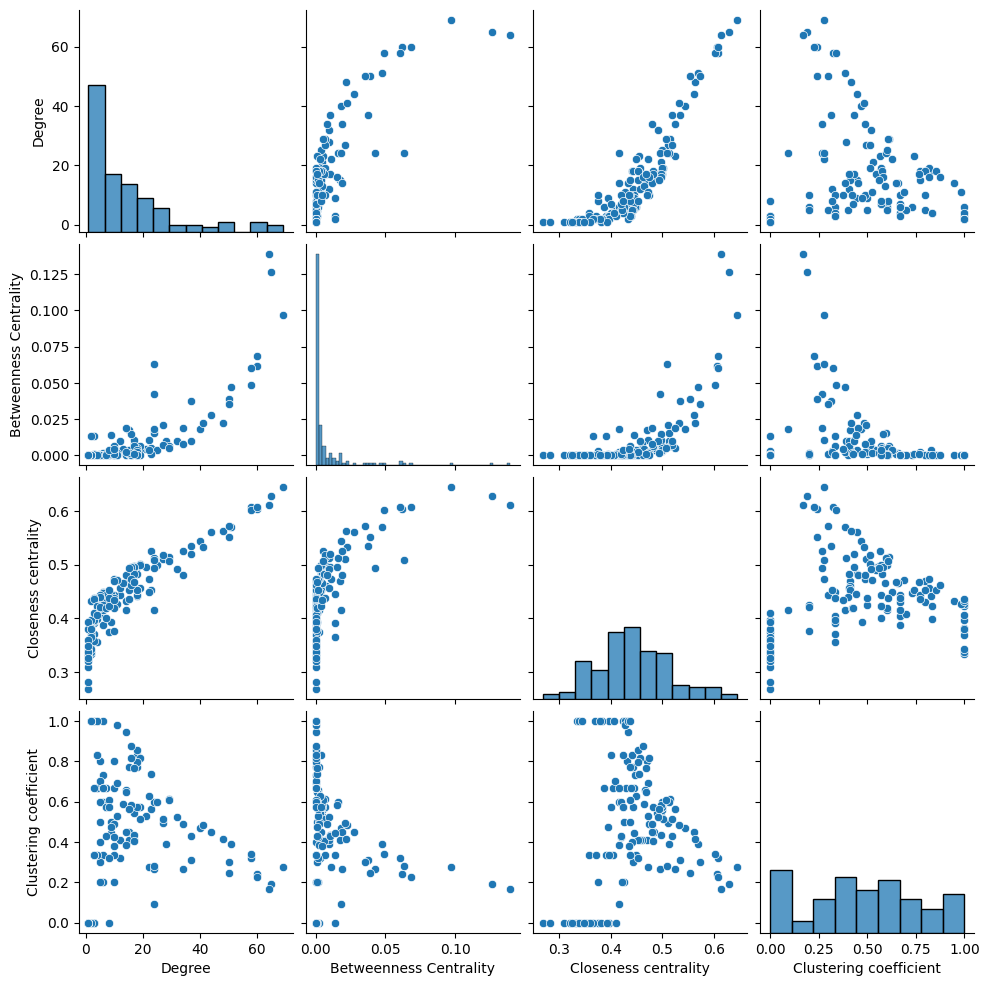

In [37]:
data = pd.DataFrame({'Degree': list(dict(nx.degree(G)).values()), 'Betweenness Centrality': list(nx.betweenness_centrality(G).values()), 'Closeness centrality' : list(nx.closeness_centrality(G).values()), 'Clustering coefficient': list(nx.clustering(G).values())})
sns.pairplot(data)

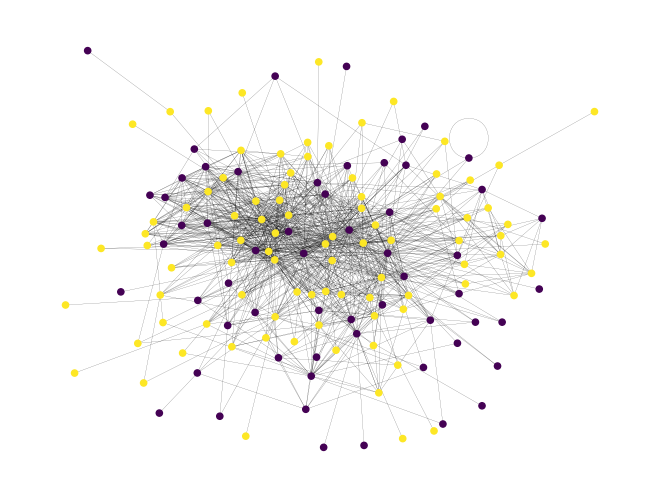

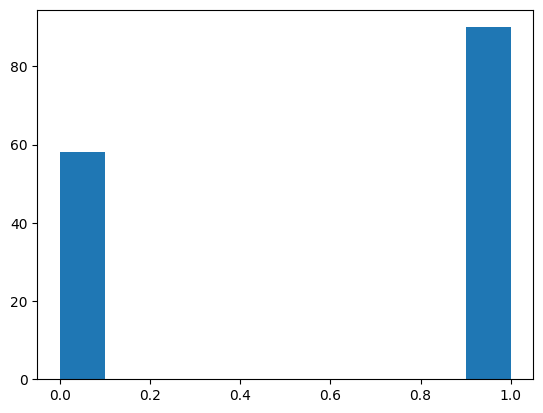

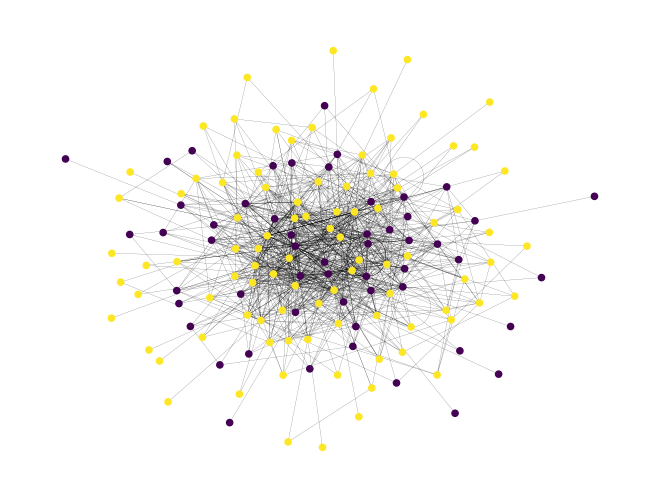

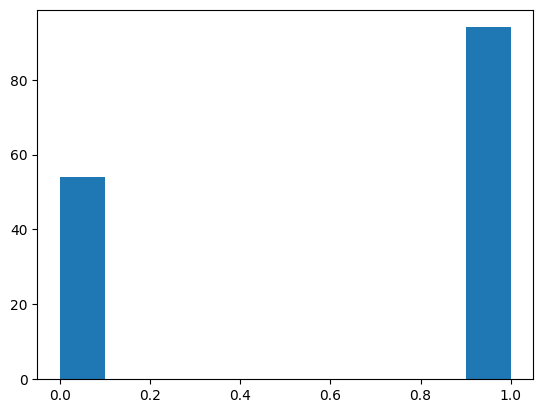

In [43]:
# generate a random partition of the graph where 60% have a feature of 1 and 40% of 0
for node in list(G.nodes()):
    G.nodes[node]['feature'] = np.random.choice([0,1], p=[0.4, 0.6])

# voter model where at each time step a random node switches its state to the one of a random neighbor
for _ in range(500):
    node = np.random.choice(list(G.nodes()))
    neighbor = np.random.choice(list(G.neighbors(node)))
    G.nodes[node]['feature'] = G.nodes[neighbor]['feature']

# plot the graph with nodes colored according to their state
plt.figure()
nx.draw(G, pos=nx.kamada_kawai_layout(G), node_size=20, width=0.1, node_color=[G.nodes[node]['feature'] for node in G.nodes()])
plt.show()

# histogram of node features
plt.figure()
plt.hist([G.nodes[node]['feature'] for node in G.nodes()])
plt.show()


degree_distribution = [G.degree(node) for node in G.nodes()]
C = nx.configuration_model(degree_distribution)

# generate a random partition of the graph where 60% have a feature of 1 and 40% of 0
for node in list(C.nodes()):
    C.nodes[node]['feature'] = np.random.choice([0,1], p=[0.4, 0.6])

# voter model where at each time step a random node switches its state to the one of a random neighbor
for _ in range(500):
    node = np.random.choice(list(C.nodes()))
    neighbor = np.random.choice(list(C.neighbors(node)))
    C.nodes[node]['feature'] = C.nodes[neighbor]['feature']

# plot the graph with nodes colored according to their state
plt.figure()
nx.draw(C, pos=nx.kamada_kawai_layout(C), node_size=20, width=0.1, node_color=[C.nodes[node]['feature'] for node in C.nodes()])
plt.show()

# histogram of node features
plt.figure()
plt.hist([C.nodes[node]['feature'] for node in C.nodes()])
plt.show()